In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

### 传统K-means

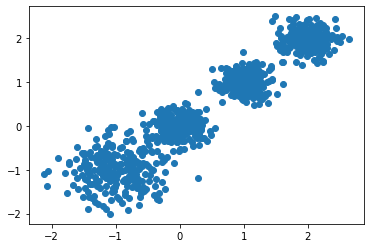

In [2]:
X,y = make_blobs(n_samples=1000,n_features=2,centers=[[-1,-1],[0,0],[1,1],[2,2]],
                cluster_std=[0.4,0.2,0.2,0.2],random_state=9)

plt.scatter(X[:,0],X[:,1],marker='o')
plt.show()

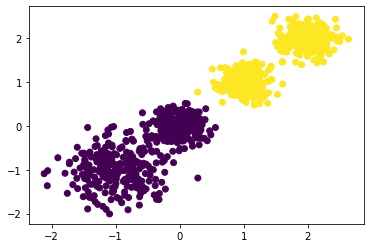

In [3]:
from sklearn.cluster import KMeans
# 选择K = 2
y_pred = KMeans(n_clusters=2,random_state=9).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.show()

In [4]:
from sklearn import metrics
metrics.calinski_harabasz_score(X,y_pred)

3116.1706763322227

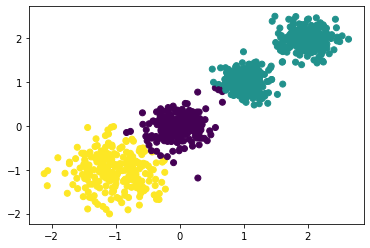

In [5]:
# 选择K = 3
y_pred = KMeans(n_clusters=3,random_state=9).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.show()

In [6]:
metrics.calinski_harabasz_score(X,y_pred)

2931.625030199556

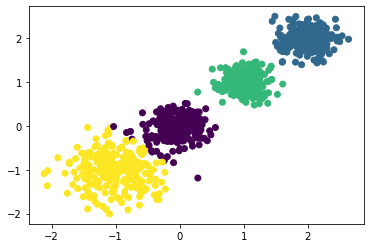

In [7]:
#选择K = 4
y_pred = KMeans(n_clusters=4,random_state=9).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.show()

In [9]:
metrics.calinski_harabasz_score(X,y_pred)

5924.050613480169

### mini-batch K-means

E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\cluster\_km

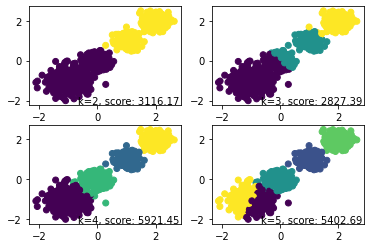

In [10]:
from sklearn.cluster import MiniBatchKMeans

for index,k in enumerate((2,3,4,5)):
    plt.subplot(2,2,index+1)
    y_pred = MiniBatchKMeans(n_clusters=k,batch_size=200,random_state=9).fit_predict(X)
    score = metrics.calinski_harabasz_score(X,y_pred)
    plt.scatter(X[:,0],X[:,1],c=y_pred)
    plt.text(.99, .01, ('k=%d, score: %.2f' % (k,score)),
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')

plt.show()

### minibatch加快了算法速度，但是会牺牲一些准确率